Python notebook for rendering panels from Figure 8 of Matikainen-Ankney et al 2021





In [10]:
!pip install seaborn==0.9.0 !pip install seaborn==0.9.0 &> /dev/null
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="white")

In [ ]:
# import compiled dataframe
df_d1stim = pd.DataFrame()
url = "https://raw.githubusercontent.com/KravitzLabDevices/FED3/main/Matikainen_Ankney_et_al_2021/data/Fig8/df_d1stim.csv"
df_d1stim = pd.read_csv(url, parse_dates = True)
df_d1stim.head()

,Unnamed: 0,MM:DD:YYYY hh:mm:ss,Device_Number,Battery_Voltage,Motor_Turns,Target_Sequence,Mouse_Sequence,Left_Poke_Count,Right_Poke_Count,Pellet_Count,Retrieval_Time,filename,RelativeTime,Errors
0,0,2019-09-24 14:01:00,1,3.72,1448297262,R,NaN,1,0,0,0,g_8_FED001_092419_05.CSV,0 days 00:00:00,NaN
1,1,2019-09-24 14:09:00,1,3.72,0,R,NaN,1,1,0,0,g_8_FED001_092419_05.CSV,0 days 00:08:00,1.0
2,2,2019-09-24 14:11:00,1,3.72,0,R,NaN,1,2,1,0,g_8_FED001_092419_05.CSV,0 days 00:10:00,1.0
3,3,2019-09-24 14:11:00,1,3.72,0,R,NaN,1,3,2,0,g_8_FED001_092419_05.CSV,0 days 00:10:00,1.0
4,4,2019-09-24 14:11:00,1,3.72,0,R,NaN,1,4,3,0,g_8_FED001_092419_05.CSV,0 days 00:10:00,1.0


In [ ]:
df_d1stim_forpp = df_d1stim.groupby(['Device_Number'], as_index=False)['Left_Poke_Count', 'Right_Poke_Count'].max()
df_d1stim_forpp_a = df_d1stim_forpp.copy()
df_d1stim_forpp_b = df_d1stim_forpp.copy()
df_d1stim_forpp_a['pokes'] = df_d1stim_forpp_a['Left_Poke_Count']
df_d1stim_forpp_a['pokes_time'] = 0
df_d1stim_forpp_b['pokes'] = df_d1stim_forpp_b['Right_Poke_Count']
df_d1stim_forpp_b['pokes_time'] = 1
df_d1stim_forpp_c = df_d1stim_forpp_a.append(df_d1stim_forpp_b)
df_d1stim_forpp_c.head()

,Device_Number,Left_Poke_Count,Right_Poke_Count,pokes,pokes_time
0,0,16,75,16,0
1,1,21,75,21,0
2,8,29,75,29,0
0,0,16,75,75,1
1,1,21,75,75,1


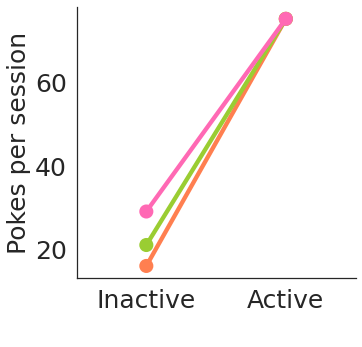

In [ ]:
#Fig 8C


sns_plot, ax = plt.subplots(figsize = (5,5))
sns.set_style("white")
my_pal = {0:"coral", 1:"yellowgreen", 8:"hotpink"}
sns_plot = sns.pointplot(data = df_d1stim_forpp_c,
           y = "pokes", x = "pokes_time", 
           order=[0, 1], palette=my_pal,
           hue='Device_Number',
           scale=1.6)


handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper left',prop={'size': 15}, frameon=False)


x = [0,1]
labels = ["Inactive","Active"]
plt.xticks(x, labels, rotation='horizontal')

plt.ylabel("Pokes per session", fontsize=25)
plt.xlabel(" ", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_visible(False)


###uncomment below to download figure

# from google.colab import files
# plt.savefig("pokes_stime.pdf", bbox_inches = 'tight')
# files.download("pokes_stime.pdf")

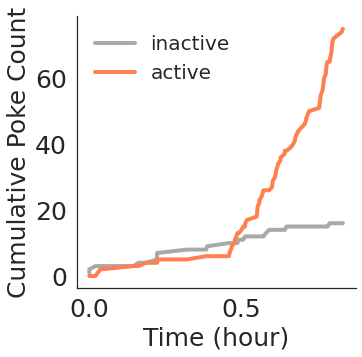

In [ ]:
#Fig 8D
import matplotlib.ticker as ticker
df_d1stim['NewTime']=df_d1stim['RelativeTime']/ np.timedelta64(1, 'h')

sns_plot, ax = plt.subplots(figsize = (5,5))

sns.set_style("white")

sns_plot = sns.lineplot(data = df_d1stim[df_d1stim.Device_Number==0], 
                   y = "Left_Poke_Count", 
                   x = "NewTime", label='inactive', 
                   color='darkgrey',
                    lw=4, ci=67)

sns_plot = sns.lineplot(data = df_d1stim[df_d1stim.Device_Number==0], 
                   y = "Right_Poke_Count", 
                   x = "NewTime", label='active',
                  color='coral', 
                    lw=4, ci=67)


ax.legend(loc='upper left',prop={'size': 12}, frameon=False)

plt.ylabel("Cumulative Poke Count", fontsize=25)
plt.xlabel("Time (hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend(loc='upper left',prop={'size': 20}, frameon=False)

###uncomment below to download figure

# from google.colab import files
# plt.savefig("mouse1.pdf", bbox_inches = 'tight')
# files.download("mouse1.pdf")

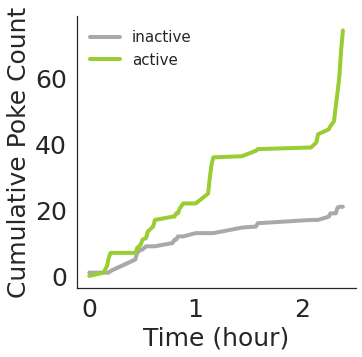

In [ ]:
#Fig 8D
import matplotlib.ticker as ticker
df_d1stim['NewTime']=df_d1stim['RelativeTime']/ np.timedelta64(1, 'h')


sns_plot, ax = plt.subplots(figsize = (5,5))



sns.set_style("white")

sns_plot = sns.lineplot(data = df_d1stim[df_d1stim.Device_Number==1], 
                   y = "Left_Poke_Count", 
                   x = "NewTime", label='inactive',
                   color='darkgrey',
                    lw=4, ci=67)
sns_plot = sns.lineplot(data = df_d1stim[df_d1stim.Device_Number==1], 
                   y = "Right_Poke_Count",
                   x = "NewTime", label='active',
                  color='yellowgreen', 
                    lw=4, ci=67)

ax.legend(loc='upper left',prop={'size': 12}, frameon=False)

plt.ylabel("Cumulative Poke Count", fontsize=25)
plt.xlabel("Time (hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend(loc='upper left',prop={'size': 15}, frameon=False)

###uncomment below to download figure

# from google.colab import files
# plt.savefig("mouse2.pdf", bbox_inches = 'tight')
# files.download("mouse2.pdf")

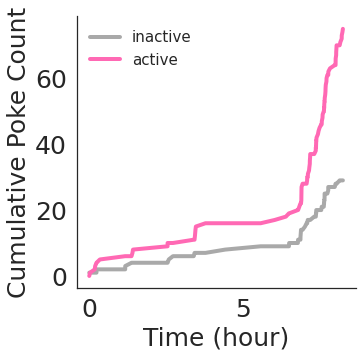

In [ ]:
#Fig8D
import matplotlib.ticker as ticker
df_d1stim['NewTime']=df_d1stim['RelativeTime']/ np.timedelta64(1, 'h')

sns_plot, ax = plt.subplots(figsize = (5,5))

sns.set_style("white")

sns_plot = sns.lineplot(data = df_d1stim[df_d1stim.Device_Number==8], 
                   y = "Left_Poke_Count", 
                   x = "NewTime", label='inactive', 
                   color='darkgrey',
                    lw=4, ci=67)

sns_plot = sns.lineplot(data = df_d1stim[df_d1stim.Device_Number==8], 
                   y = "Right_Poke_Count", label='active',
                   x = "NewTime",
                  color='hotpink', 
                    lw=4, ci=67)

ax.legend(loc='upper left',prop={'size': 12}, frameon=False)

plt.ylabel("Cumulative Poke Count", fontsize=25)
plt.xlabel("Time (hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper left',prop={'size': 15}, frameon=False)

###uncomment below to download figure

# from google.colab import files
# plt.savefig("mouse3.pdf", bbox_inches = 'tight')
# files.download("mouse3.pdf")